In [8]:
#libraries
from sklearn import datasets, model_selection, linear_model
import matplotlib.pyplot as plt

In [3]:
#load the dataset
linnerud = datasets.load_linnerud()

In [4]:
# select the feature and target variables
print('Features: ', linnerud.feature_names)
print('Target: ', linnerud.target_names)

waistline = linnerud.data[:,1].reshape(-1,)
situps = linnerud.target[:, 1]

print(waistline, situps)

Features:  ['Chins', 'Situps', 'Jumps']
Target:  ['Weight', 'Waist', 'Pulse']
[[162.]
 [110.]
 [101.]
 [105.]
 [155.]
 [101.]
 [101.]
 [125.]
 [200.]
 [251.]
 [120.]
 [210.]
 [215.]
 [ 50.]
 [ 70.]
 [210.]
 [ 60.]
 [230.]
 [225.]
 [110.]] [36. 37. 38. 35. 35. 36. 38. 34. 31. 33. 34. 33. 34. 46. 36. 37. 37. 32.
 33. 33.]


In [10]:
X = situps
y = waistline

# splitting the dataset into training and testing splits
X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y, test_size=0.3)

In [11]:
model = linear_model.LinearRegression()
model.fit(X_train, y_train)

ValueError: Expected 2D array, got 1D array instead:
array=[34. 36. 37. 38. 36. 34. 38. 31. 36. 33. 32. 33. 34. 35.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

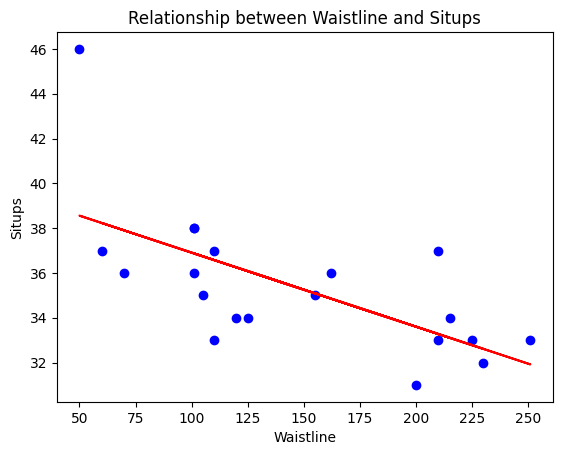

In [12]:
# Import necessary libraries
from sklearn import datasets
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Load the linnerud dataset
linnerud = datasets.load_linnerud()

# The Linnerud dataset contains physiological and exercise variables measured on 20 middle-aged men in a fitness club.
# The exercise variables are: Weight, Waist and Pulse.
# The physiological variables are: Chins, Situps and Jumps.

# Let's assume 'Waist' is at index 1 and 'Situps' is at index 1 in the data
waistline = linnerud.data[:, 1].reshape(-1, 1)
situps = linnerud.target[:, 1]

# Create a Linear Regression model
model = LinearRegression()

# Fit the model with waistline and situps data
model.fit(waistline, situps)

# Now we can plot the relationship between waistline and situps
plt.scatter(waistline, situps, color='blue')
plt.plot(waistline, model.predict(waistline), color='red')
plt.title('Relationship between Waistline and Situps')
plt.xlabel('Waistline')
plt.ylabel('Situps')
plt.show()

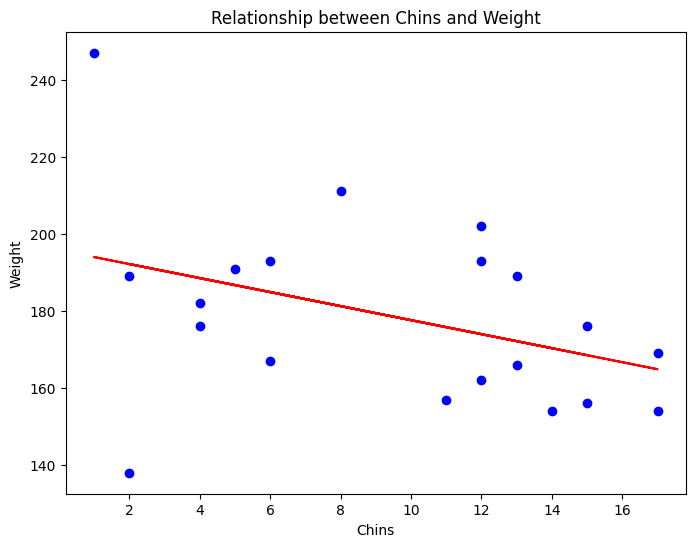

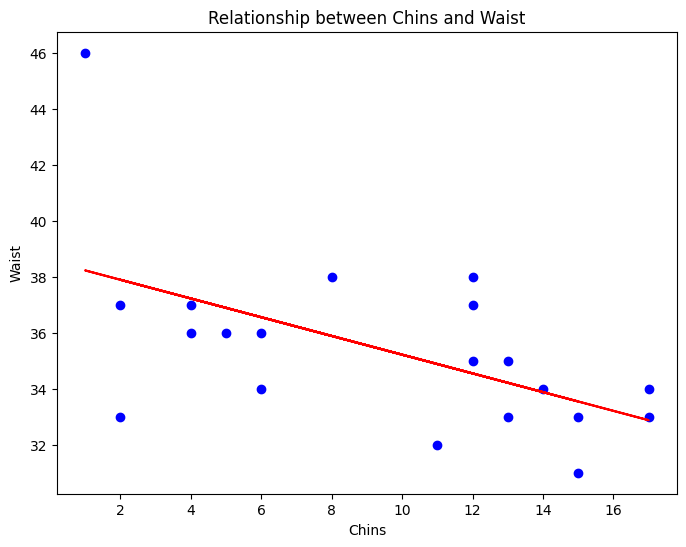

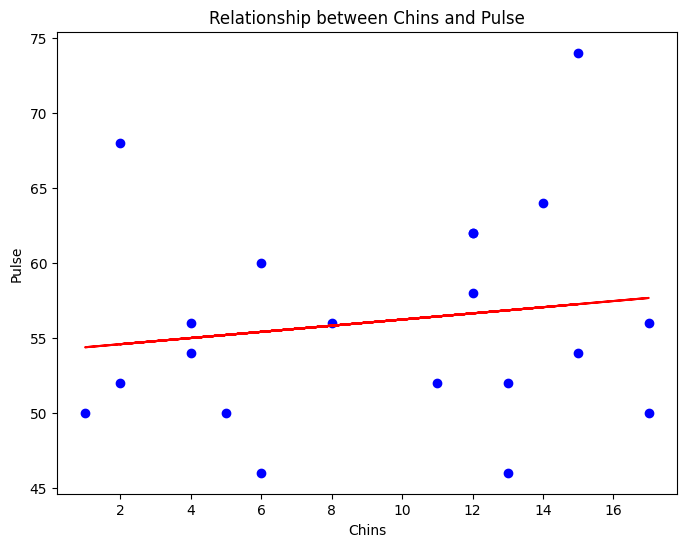

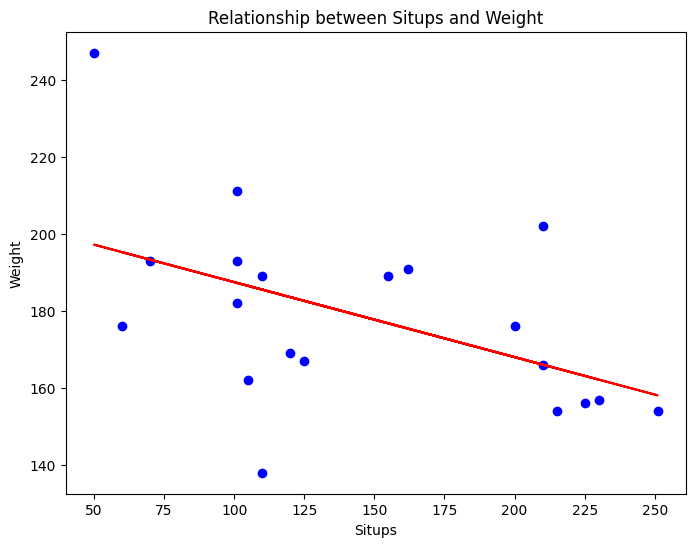

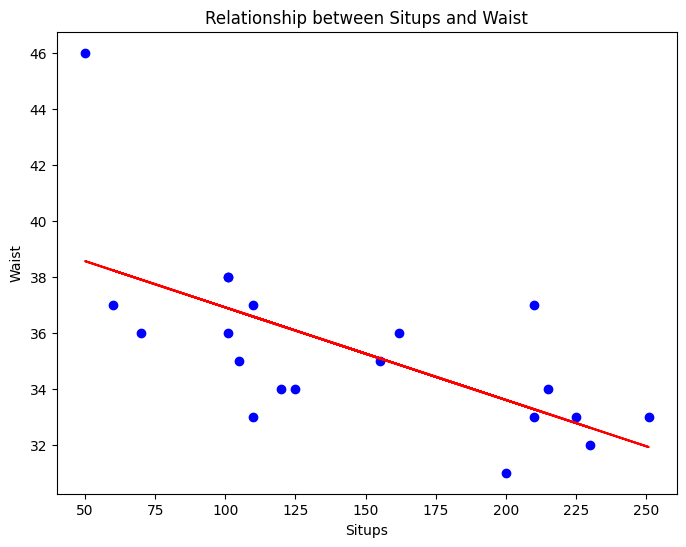

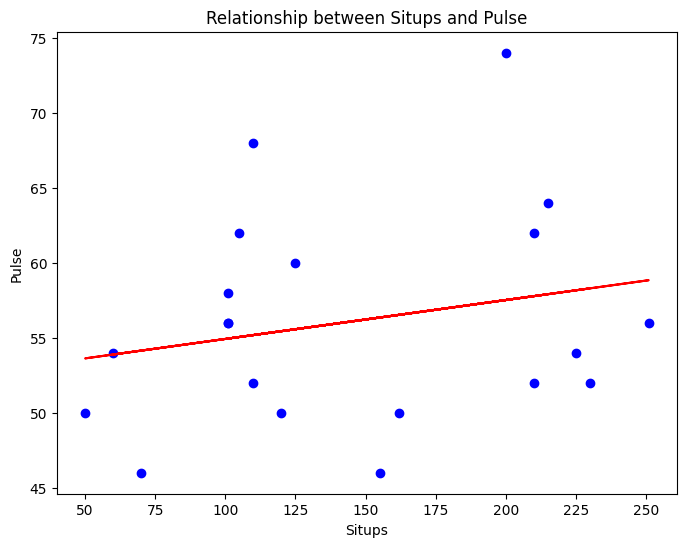

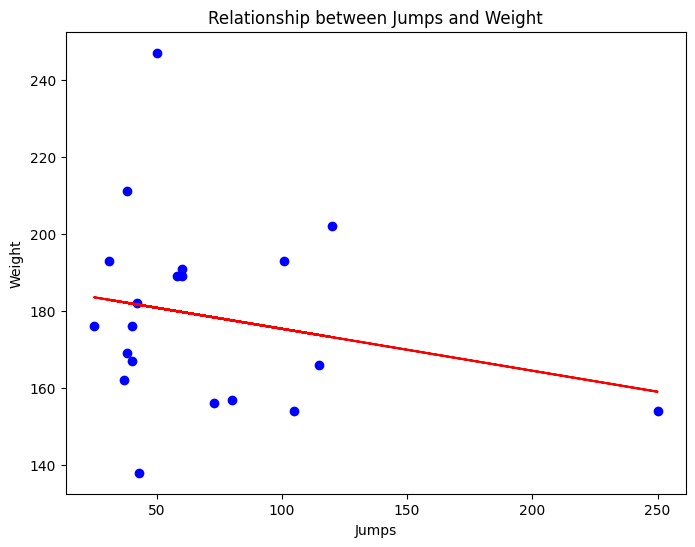

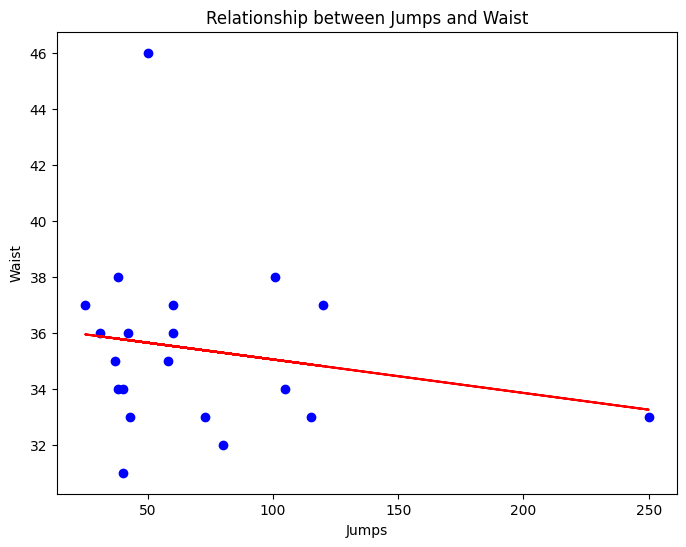

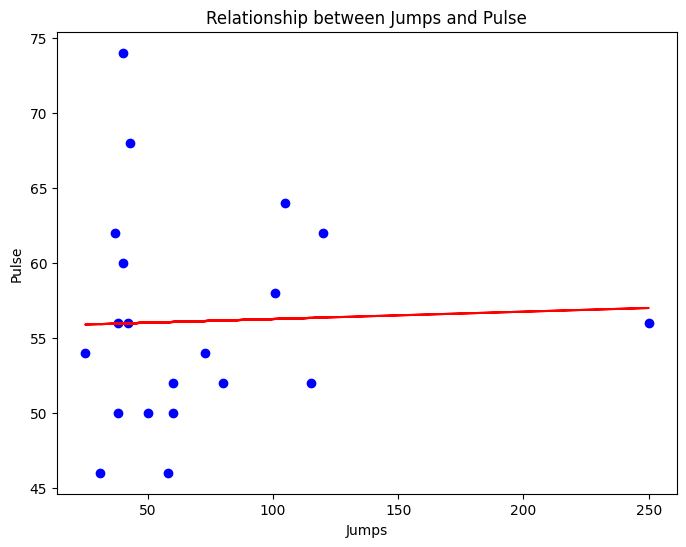

In [13]:
# Import necessary libraries
from sklearn import datasets
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Load the Linnerud dataset
linnerud = datasets.load_linnerud()

# The Linnerud dataset contains physiological and exercise variables measured on 20 middle-aged men in a fitness club.
# The exercise variables are: Weight, Waist and Pulse.
# The physiological variables are: Chins, Situps and Jumps.

# Create a Linear Regression model
model = LinearRegression()

# For each pair of exercise and physiological variables
for i in range(3):
    for j in range(3):
        # Extract the data for the current pair of variables
        x = linnerud.data[:, i].reshape(-1, 1)
        y = linnerud.target[:, j]

        # Fit the model with the current pair of data
        model.fit(x, y)

        # Plot the relationship between the current pair of variables
        plt.figure(figsize=(8, 6))
        plt.scatter(x, y, color='blue')
        plt.plot(x, model.predict(x), color='red')
        plt.title(f'Relationship between {linnerud.feature_names[i]} and {linnerud.target_names[j]}')
        plt.xlabel(linnerud.feature_names[i])
        plt.ylabel(linnerud.target_names[j])
        plt.show()
